In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Налаштування відображення
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# Завантаження даних
df = pd.read_csv('../data/raw/train_music.csv')
feature_dict = pd.read_excel('../data/raw/Feature_dictionary.xlsx')

print(f"Розмір датасету: {df.shape}")
df.head()

Розмір датасету: (70000, 461)


,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,service_2_flag,service_3_flag,is_obl_center,is_my_vf,balance_sum,paym_last_days,inact_days_count,count_sms_source_1,count_sms_source_2,count_sms_source_3,count_sms_source_4,count_sms_source_5,count_sms_source_6,count_sms_source_7,count_sms_source_8,count_sms_source_9,count_sms_source_10,count_sms_source_11,count_sms_source_12,count_sms_source_13,count_sms_source_14,count_sms_source_15,count_sms_source_16,count_url_category_1,count_url_category_2,count_url_category_3,count_url_category_4,count_url_category_6,count_url_category_7,count_url_category_8,count_url_category_9,count_url_category_10,count_url_category_11,count_url_category_12,count_url_category_13,count_url_category_15,vol_app_1,vol_app_2,...,voice_onnet_out_day_rest_count_m3,voice_onnet_out_night_work_count_m3,voice_onnet_out_night_rest_count_m3,voice_onnet_in_day_work_count_m3,voice_onnet_in_day_rest_count_m3,voice_onnet_in_night_work_count_m3,voice_onnet_in_night_rest_count_m3,voice_omo_out_count_m3,voice_omo_in_count_m3,voice_omo_out_day_work_count_m3,voice_omo_out_day_rest_count_m3,voice_omo_out_night_work_count_m3,voice_omo_out_night_rest_count_m3,voice_omo_in_day_work_count_m3,voice_omo_in_day_rest_count_m3,voice_omo_in_night_work_count_m3,voice_omo_in_night_rest_count_m3,voice_global_out_count_m3,voice_global_in_count_m3,voice_global_day_work_count_m3,voice_global_day_rest_count_m3,voice_global_night_work_count_m3,voice_global_night_rest_count_m3,voice_roam_out_count_m3,voice_roam_in_count_m3,voice_pstn_out_count_m3,voice_pstn_in_count_m3,voice_onnet_cc_count_m3,voice_omo_cc_count_m3,short_in_calls_part_m3,short_out_calls_part_m3,voice_out_uniq_count_m3,voice_in_uniq_count_m3,sms_out_count_m3,sms_in_count_m3,sms_onnet_out_pack_count_m3,sms_omo_out_pack_count_m3,sms_roam_out_count_m3,sms_roam_in_count_m3,content_count_m3,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,48104912810,0,7,1514,3,1.0,0,0.496508,0,299.0,0.0,0.0,1.0,0.0,0,0,1.001696,66.0,21457.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,13762.315646,1292.468784,NaN
1,4851497268,0,4,896,28,1.0,0,0.881540,0,189.0,1.0,58.0,1.0,0.0,0,0,43.927237,21457.0,21457.0,0.0,0.0,0.0,4.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,21.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000053,NaN
2,4877823097,0,7,592,3,2.0,0,0.811192,0,347.0,0.0,0.0,1.0,0.0,0,1,14.006762,18.0,21457.0,0.0,0.0,0.0,11.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230618787.0,NaN,...,9.0,8.0,5.0,22.0,17.0,10.0,5.0,11.0,5.0,0.0,2.0,9.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.060606,23.0,32.0,1.0,32.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000977,NaN
3,4830183791,0,7,1756,3,2.0,0,0.928449,1,343.0,1.0,418.0,1.0,0.0,1,0,-2.841401,22.0,21457.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,5.0,0.0,57.0,15.0,22.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,16.0,27.0,3.0,62.0,0.0,0.0,0.0,0.0,16.0,66.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.006680,NaN
4,48103940036,0,4,1057,28,1.0,0,0.578654,0,355.0,0.0,0.0,1.0,0.0,1,0,12.025003,10.0,21457.0,0.0,0.

Частка класів (%):
target
0    92.427143
1     7.572857
Name: proportion, dtype: float64


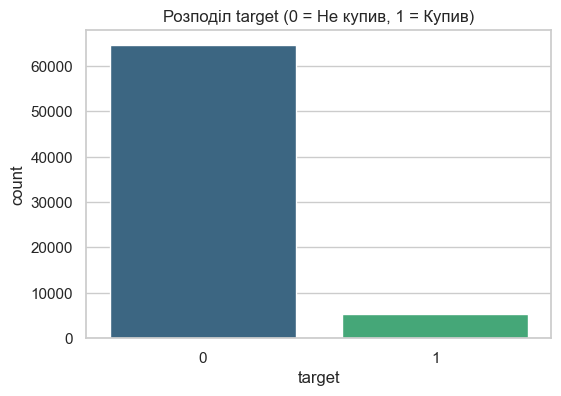

In [11]:
# Перевірка балансу класів
target_counts = df['target'].value_counts(normalize=True) * 100
print("Частка класів (%):")
print(target_counts)

# Візуалізація
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, hue='target', legend=False, palette='viridis')
plt.title('Розподіл target (0 = Не купив, 1 = Купив)')
plt.show()

Кількість колонок з пропусками: 449

Топ-10 колонок з найбільшою кількістю пропусків (%):
count_url_category_13    99.277143
count_url_category_15    98.702857
count_app_3              98.664286
vol_app_3                98.664286
count_url_category_12    98.312857
vol_app_11               97.732857
count_app_11             97.732857
vol_app_13               97.314286
count_app_13             97.314286
count_url_category_1     97.218571
dtype: float64


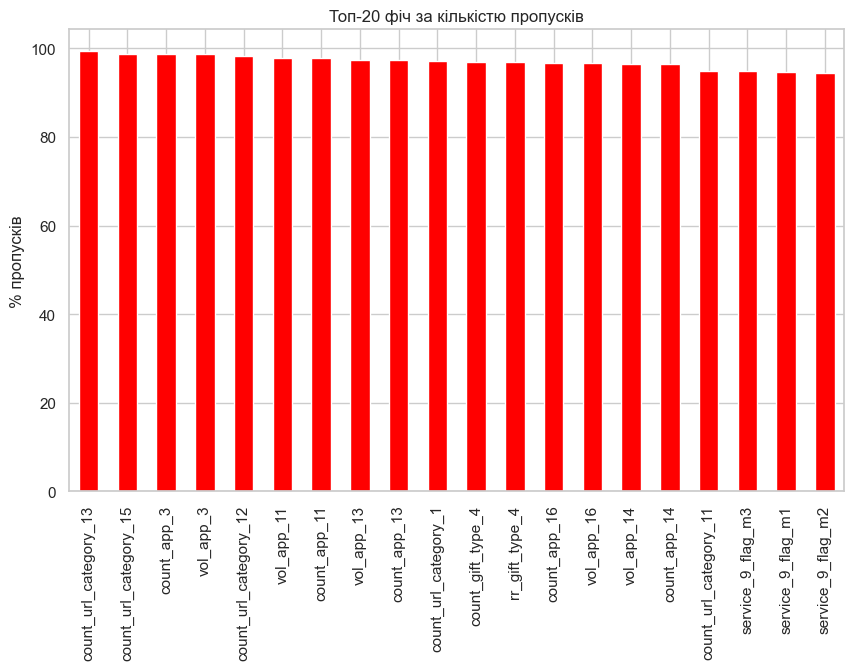

In [12]:
# --- БЛОК 2: Аналіз пропусків ---
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print(f"Кількість колонок з пропусками: {len(missing_percent)}")
if len(missing_percent) > 0:
    print("\nТоп-10 колонок з найбільшою кількістю пропусків (%):")
    print(missing_percent.head(10))

    # Малюємо графік
    plt.figure(figsize=(10, 6))
    missing_percent.head(20).plot(kind='bar', color='red')
    plt.title('Топ-20 фіч за кількістю пропусків')
    plt.ylabel('% пропусків')
    plt.show()

In [13]:
# --- БЛОК 3: Очищення (Cleaning) ---

# Видалення дублікатів
df_clean = df.drop_duplicates()
print(f"Дублікатів видалено: {len(df) - len(df_clean)}")

# Заповнення пропусків
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
num_cols = [c for c in num_cols if c != 'target']

cat_cols = df_clean.select_dtypes(include=['object']).columns

# Заповнюємо числа медіаною
for col in num_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)

# Заповнюємо категорії модою (найчастішим значенням)
for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        # Перевірка, чи існує мода
        if not df_clean[col].mode().empty:
            mode_val = df_clean[col].mode()[0]
            df_clean[col] = df_clean[col].fillna(mode_val)

# Видалення константних колонок
const_cols = [col for col in df_clean.columns if df_clean[col].nunique() <= 1]
if const_cols:
    df_clean = df_clean.drop(columns=const_cols)
    print(f"Видалено константних колонок: {len(const_cols)}")

print(f"\nРозмір після очищення: {df_clean.shape}")

Дублікатів видалено: 0
Видалено константних колонок: 19

Розмір після очищення: (70000, 442)


In [17]:
# Зберігаємо файл
df_clean.to_csv('../data/processed/train_music_cleaned.csv', index=False)